Purpose:
- quantify dimensionality of different feature spaces in a relatively precise way

Method
1. stack all runs and identify components
2. per run, identify components

In [1]:
# libraries
import numpy as np
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Assign/create directories
# data_dir = '/dartfs/rc/lab/D/DBIC/DBIC/life_data/'
data_dir = '/Volumes/life_data'
# Semantic model directory (/idata/DBIC/cara/w2v/w2v_features)
model_dir = os.path.join(data_dir, 'w2v_feature')

# load model
f = 'bg' #'agents' 'actions'
model_f = f'visual_{f}.npy'
model = np.load(os.path.join(model_dir, model_f))

In [4]:
model.shape # time, feature dimension

(1488, 300)

In [6]:
pca = PCA()
pca.fit(model)

PCA()

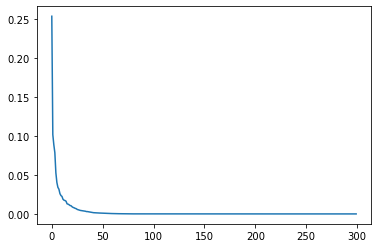

In [8]:
plt.plot(pca.explained_variance_ratio_)


In [9]:
np.cumsum(pca.explained_variance_ratio_)

array([0.2535719 , 0.3552235 , 0.44389743, 0.5224686 , 0.57524127,
       0.61559635, 0.64963114, 0.68136483, 0.70738524, 0.73093516,
       0.7533637 , 0.772163  , 0.7897722 , 0.8069108 , 0.8231945 ,
       0.8361334 , 0.84867054, 0.8604132 , 0.8711475 , 0.8815564 ,
       0.8906363 , 0.89893997, 0.90674525, 0.9138557 , 0.92055154,
       0.9262984 , 0.9316359 , 0.9365528 , 0.9410442 , 0.94532   ,
       0.9494873 , 0.9532274 , 0.95683783, 0.96027863, 0.9633035 ,
       0.9662923 , 0.9690295 , 0.9713955 , 0.97368336, 0.9755804 ,
       0.9772322 , 0.9788063 , 0.980285  , 0.9817227 , 0.9830763 ,
       0.98431903, 0.985483  , 0.98660564, 0.9876627 , 0.9886608 ,
       0.989576  , 0.9903634 , 0.9911115 , 0.99181837, 0.99250674,
       0.99317616, 0.99373996, 0.9942675 , 0.99476796, 0.99523735,
       0.9956601 , 0.996048  , 0.9964134 , 0.99673927, 0.9970548 ,
       0.9973557 , 0.9976214 , 0.997863  , 0.9980913 , 0.99830383,
       0.9985152 , 0.9986986 , 0.9988679 , 0.9990307 , 0.99917

In [10]:
pcts = [.90, .95, .99]
for pct in pcts:
    vaf = np.sum(np.cumsum(pca.explained_variance_ratio_ ) <pct) + 1
    print(pct, vaf)

0.9 23
0.95 32
0.99 52


# Full code for all three features

In [12]:
# Full code for all three features
data_dir = '/Volumes/life_data'
model_dir = os.path.join(data_dir, 'w2v_feature')

pcts = [.90, .95, .99]
for f in ['bg', 'actions', 'agents', 'moten']:
    model_f = f'visual_{f}.npy'
    model = np.load(os.path.join(model_dir, model_f))
    pca = PCA()
    pca.fit(model)
    print("-- feature:", f)
    print(f"40 PC: {np.cumsum(pca.explained_variance_ratio_)[39]}, 60 PC: {np.cumsum(pca.explained_variance_ratio_)[59]}")
    for pct in pcts:
        vaf = np.sum(np.cumsum(pca.explained_variance_ratio_ ) <pct) + 1
        print(pct, vaf)
        

-- feature: bg
40 PC: 0.9755804538726807, 60 PC: 0.9952373504638672
0.9 23
0.95 32
0.99 52
-- feature: actions
40 PC: 0.9613391160964966, 60 PC: 0.9905361533164978
0.9 25
0.95 36
0.99 60
-- feature: agents
40 PC: 0.977070689201355, 60 PC: 0.9972688555717468
0.9 23
0.95 31
0.99 50
-- feature: moten
40 PC: 0.8143631219863892, 60 PC: 0.8469752669334412
0.9 121
0.95 268
0.99 728


In [8]:
len(np.cumsum(pca.explained_variance_ratio_))

1487

In [10]:
np.cumsum(pca.explained_variance_ratio_)[39], np.cumsum(pca.explained_variance_ratio_)[59]


(0.8143631, 0.84697527)

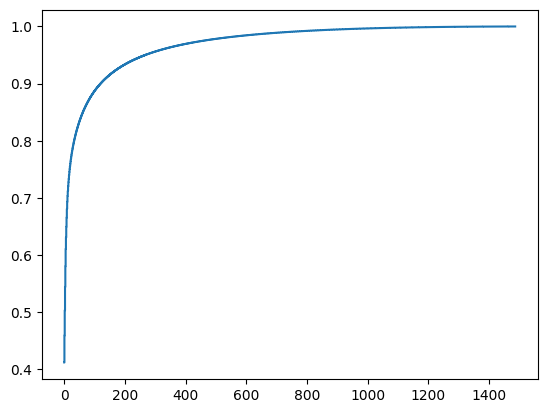

In [7]:
plt.step(range(0,len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), where='mid',label='Cumulative explained variance')

In [3]:
model_durs = {1: 369, 2: 341, 3: 372, 4: 406}
model_splits = np.cumsum(list(model_durs.values()))[:-1]
model_runs = np.split(model, model_splits, axis=0)

In [4]:
model_splits

array([ 369,  710, 1082])

In [5]:
for i in model_runs:
    print(i.shape)


(369, 2530)
(341, 2530)
(372, 2530)
(405, 2530)


In [6]:
for testrun in np.arange(4):
    trainruns = [r for r in np.arange(4) if r != testrun]
    print(trainruns)

[1, 2, 3]
[0, 2, 3]
[0, 1, 3]
[0, 1, 2]


# V2 taking folds into account

In [13]:
# Full code for all three features
data_dir = '/Volumes/life_data'
model_dir = os.path.join(data_dir, 'w2v_feature')

model_durs = {1: 369, 2: 341, 3: 372, 4: 406}
model_splits = np.cumsum(list(model_durs.values()))[:-1]


pcts = [.90, .95, .99]
for testrun in np.arange(4):
    # trainruns = [r for r in np.arange(4) if r != testrun]
    print(f"testrun: {testrun}")
    for f in ['bg', 'actions', 'agents', 'moten']:
        model_f = f'visual_{f}.npy'
        model = np.load(os.path.join(model_dir, model_f))
        model_runs = np.vstack([m for i, m in enumerate(np.split(model, model_splits, axis=0)) if i != testrun])
        # model_runs = np.array(np.split(model, model_splits, axis=0))[trainruns]

        pca = PCA()
        scaler = StandardScaler()
        model_stack = scaler.fit_transform(model_runs)
        pca.fit(model_stack)
        print(model_stack.shape)
        print("-- feature:", f)
        print(f"40 PC: {np.cumsum(pca.explained_variance_ratio_)[39]}, 60 PC: {np.cumsum(pca.explained_variance_ratio_)[59]}")
        for pct in pcts:
            vaf = np.sum(np.cumsum(pca.explained_variance_ratio_ ) <pct) + 1
            print(pct, vaf)

testrun: 0
(1119, 300)
-- feature: bg
40 PC: 0.9861819744110107, 60 PC: 0.9988791942596436
0.9 20
0.95 27
0.99 44
(1119, 300)
-- feature: actions
40 PC: 0.9721279740333557, 60 PC: 0.996355414390564
0.9 24
0.95 33
0.99 52
(1119, 300)
-- feature: agents
40 PC: 0.9901213049888611, 60 PC: 1.0000001192092896
0.9 19
0.95 26
0.99 40
(1118, 2530)
-- feature: moten
40 PC: 0.8006621599197388, 60 PC: 0.837634265422821
0.9 127
0.95 260
0.99 640
testrun: 1
(1147, 300)
-- feature: bg
40 PC: 0.9775729179382324, 60 PC: 0.9966280460357666
0.9 22
0.95 31
0.99 50
(1147, 300)
-- feature: actions
40 PC: 0.9642050862312317, 60 PC: 0.9938596487045288
0.9 26
0.95 36
0.99 56
(1147, 300)
-- feature: agents
40 PC: 0.9844095706939697, 60 PC: 0.9992031455039978
0.9 21
0.95 28
0.99 45
(1146, 2530)
-- feature: moten
40 PC: 0.799563467502594, 60 PC: 0.8365612030029297
0.9 128
0.95 265
0.99 658
testrun: 2
(1116, 300)
-- feature: bg
40 PC: 0.9846877455711365, 60 PC: 0.9983804821968079
0.9 22
0.95 28
0.99 45
(1116, 300)

- round number
- relatively over .95 for every feature and run
- 40 components (over .95 for all)
- 60 components (over .99 for all)

In [ ]:
# load model
def load_model(model_f, train_runs, test_run, model_durs,
               run_pca=False, n_components=None):
    
    # Load model and split into runs
    print(f"\n2. Semantic model ({model_f.split('_')[1].split('.')[0]})")
    model = np.load(os.path.join(model_dir, model_f))
    model_splits = np.cumsum(list(model_durs.values()))[:-1]
    model_runs = np.split(model, model_splits, axis=0)
    assert [len(r) for r in model_runs] == list(model_durs.values())

    # Split model runs into training and test sets
    train_model = model_runs[:test_run - 1] + model_runs[test_run:]
    test_model = model_runs[test_run - 1]
    for m in train_model:
        assert not np.array_equal(m, test_model)

    # Optionally reduce dimensionality of model with PCA
    if run_pca:

        # Concatenate training model across runs
        train_splits = np.cumsum([len(r) for r in train_model])[:-1]
        train_model = np.concatenate(train_model, axis=0)

        assert train_model.shape[1] == test_model.shape[1] == model_ndim
        train_model, test_model = model_pca(train_model,
                                            test_model,
                                            n_components)
        
        # Re-split training model into runs
        train_model = np.split(train_model, train_splits)

    # Horizontally stack lagged versions of the stimulus model
    lags = [1, 2, 3, 4]
    train_cats, train_durs = [], {}
    for r, train_run in zip(train_runs, train_model):
        train_cat = np.concatenate((train_run[lags[-1] - 1:-lags[0]],
                                    train_run[lags[-2] - 1:-lags[1]],
                                    train_run[lags[-3] - 1:-lags[2]],
                                    train_run[lags[-4] - 1:-lags[3]]), axis=1)
        
        # Z-score each training run
        train_cat = zscore(train_cat, axis=0)
        
        train_cats.append(train_cat)
        train_durs[r] = train_cat.shape[0]
        print(f"Train model run {r} shape:"
              f"\n\toriginal {train_run.shape} -> lagged {train_cat.shape}")
    train_model = np.concatenate(train_cats, axis=0)
    
    test_model = np.concatenate((test_model[lags[-1] - 1:-lags[0]],
                                 test_model[lags[-2] - 1:-lags[1]],
                                 test_model[lags[-3] - 1:-lags[2]],
                                 test_model[lags[-4] - 1:-lags[3]]), axis=1)
    
    # Z-score each model run separately
    test_model = zscore(test_model, axis=0)
    
    print("Concatenated training model shape:", train_model.shape,
          f"\nTest model run {test_run} shape:", test_model.shape)

    return train_model, train_durs, test_model